In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('loan-train.csv')
df_test = pd.read_csv('loan-test.csv')

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# df.describe()
# total 613 rows and 12 cols
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_train.shape

(614, 13)

In [6]:
# to check how does a particular attribute plays a role in determing a label
# pd.crosstab(df['LoanAmount'], df['Loan_Status'], margins=True)
pd.crosstab(df_train['Property_Area'], df_train['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [7]:
df_train['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

<Axes: >

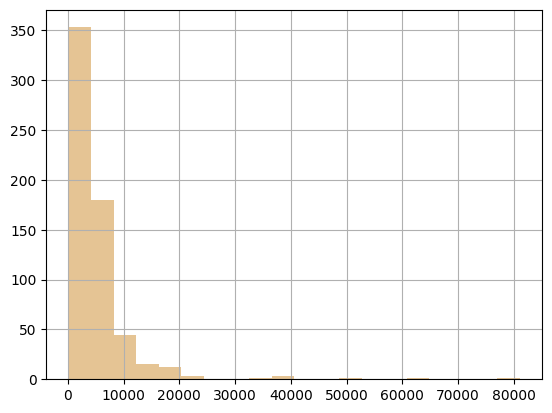

In [8]:
df_train['ApplicantIncome'].hist(bins=20, color = '#e5c494')
# confirmed it is right skwed so we will have to normalise it.

<Axes: >

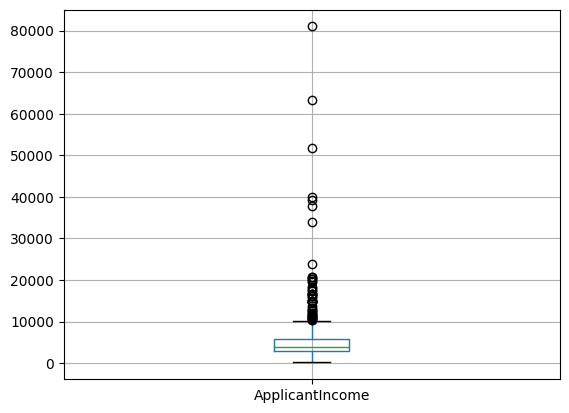

In [9]:
df_train.boxplot('ApplicantIncome')
# shows we go a lot many outliers.

<Axes: >

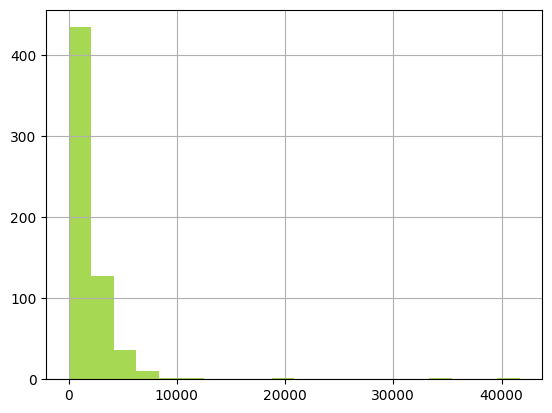

In [10]:
df_train['CoapplicantIncome'].hist(bins=20, color = '#a6d854')
# df_train.boxplot('CoapplicantIncome')

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Gender'>

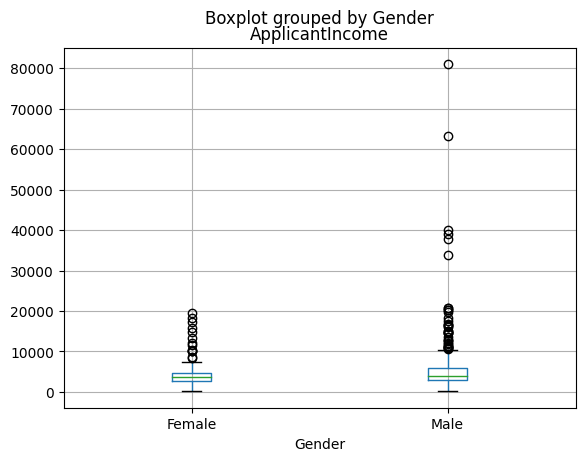

In [11]:
df_train.boxplot('ApplicantIncome', by='Gender')
# acc to this median salary does not matter too much irrespective of gender but we can see males have much more salary income.

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

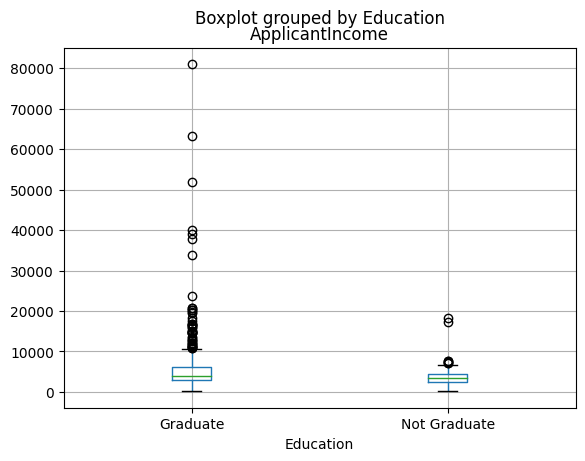

In [12]:
df_train.boxplot('ApplicantIncome', by='Education')
# median doesn not influctute but graduate earns more.

<Axes: >

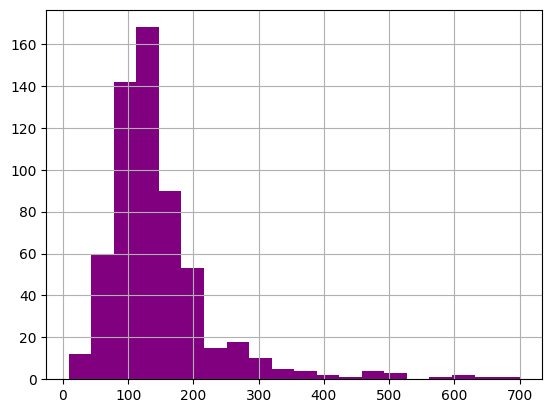

In [13]:
df_train['LoanAmount'].hist(bins=20, color = 'purple')

<Axes: >

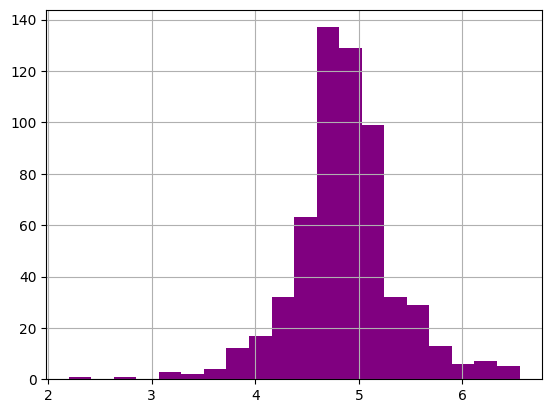

In [14]:
# This operation is often used to transform data, especially when the original data has a skewed distribution.
# new column are the natural logarithm
df_train['LoanAmount_withlog'] = np.log(df_train['LoanAmount'])
df_train['LoanAmount_withlog'].hist(bins=20, color = 'purple')

In [15]:
df_train.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
LoanAmount_withlog    22
dtype: int64

In [16]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace = True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace = True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace = True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace = True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace = True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace = True)

In [17]:
df_train['LoanAmount_withlog']= df_train['LoanAmount_withlog'].fillna(df_train['LoanAmount_withlog'].mean())
df_train['LoanAmount']= df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())

In [18]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_withlog    0
dtype: int64

In [19]:
df_train['Total_Income'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train['Total_Income'] = np.log(df_train['Total_Income'])

<Axes: >

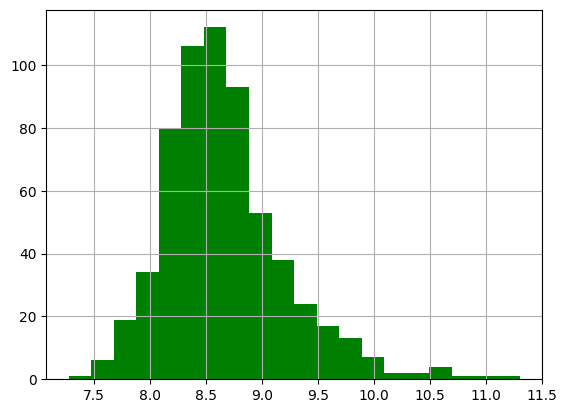

In [20]:
df_train['Total_Income'].hist(bins=20, color='green')

In [21]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_withlog,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,8.699515


In [22]:
x = df_train.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df_train.iloc[:,12].values

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x, y , test_size = 0.2, random_state=0)

In [24]:
# pd.get_dummies(df_train,columns=['Married'])
X_train

array([['Male', 'Yes', '0', ..., 1.0, 4.875197323201151,
        8.675563527387679],
       ['Male', 'No', '1', ..., 1.0, 5.278114659230517,
        9.328123407632566],
       ['Male', 'Yes', '0', ..., 0.0, 5.003946305945459,
        8.644882552557126],
       ...,
       ['Male', 'Yes', '3+', ..., 1.0, 5.298317366548036,
        9.0280988119824],
       ['Male', 'Yes', '0', ..., 1.0, 5.075173815233827,
        8.704999678440762],
       ['Female', 'Yes', '0', ..., 1.0, 5.204006687076795,
        8.777401286867264]], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [26]:
for i in range(0,5):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])
X_train[:,7] = labelencoder_X.fit_transform(X_train[:,7])

In [27]:
for i in range(0,5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])
X_test[:,7] = labelencoder_X.fit_transform(X_test[:,7])

In [28]:
labelencoder_Y = LabelEncoder()
Y_train = labelencoder_Y.fit_transform(Y_train)
Y_test = labelencoder_Y.fit_transform(Y_test)
# Y_test

In [29]:
# to find numpy index.
# ApplicantIncome_index = df_train.columns.get_loc('ApplicantIncome')
# print(ApplicantIncome_index)

In [30]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
prediction = dtc.predict(X_test)
prediction

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [33]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, prediction)
accuracy

0.7073170731707317

In [34]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train,Y_train)

GaussianNB()

In [35]:
prediction_nb = NBClassifier.predict(X_test)
prediction_nb

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [36]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, prediction_nb)
accuracy

0.8292682926829268

Working with test csv 

In [37]:
df_test = pd.read_csv('loan-test.csv')

In [38]:
# does not have the last col
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [39]:
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [40]:
# mode if categorial and mean if numerical.
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace = True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace = True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace = True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0], inplace = True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace = True)
df_test['LoanAmount']= df_test['LoanAmount'].fillna(df_train['LoanAmount'].mean())

In [41]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [42]:
# same upar jaisa boxplot me outlier dikha toh isliye
df_test['LoanAmount_withlog'] = np.log(df_test['LoanAmount'])

<Axes: >

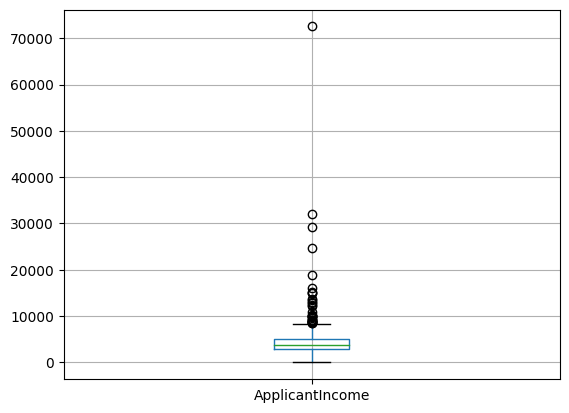

In [43]:
df_test.boxplot('ApplicantIncome')

In [44]:
df_test['Total_income_test'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']

In [45]:
df_test['Total_income_test_log'] = np.log(df_test['Total_income_test'])

In [46]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_withlog,Total_income_test,Total_income_test_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [47]:
test = df_test.iloc[:,np.r_[1:5,9:11,13:15]].values

In [48]:
for i in range(0,5):
    test[:,i] = labelencoder_X.fit_transform(test[:,i])

In [49]:
test[:,7] = labelencoder_X.fit_transform(test[:,7])

In [50]:
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [51]:
test = ss.fit_transform(test)

In [52]:
pred = NBClassifier.predict(test)

In [53]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Visualizations

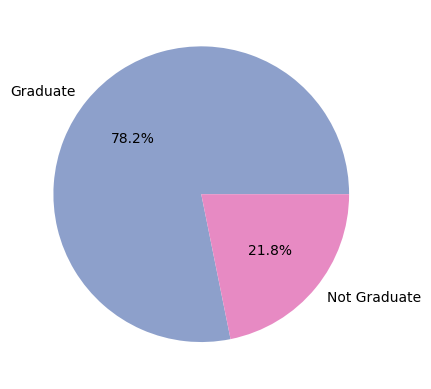

In [54]:
values = df_train['Education'].value_counts()
colors = ['#8da0cb', '#e78ac3', '#ffd92f', '#e5c494']
# autopct for %
plt.pie(values, labels=values.index, autopct='%1.1f%%', colors=colors)
plt.show()

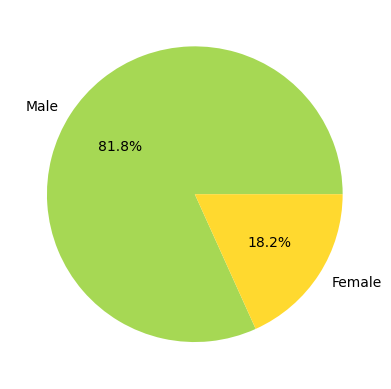

In [55]:
values = df_train['Gender'].value_counts()
colors = ['#a6d854', '#ffd92f']
# autopct for %
plt.pie(values, labels=values.index, autopct='%1.1f%%', colors=colors)
plt.show()

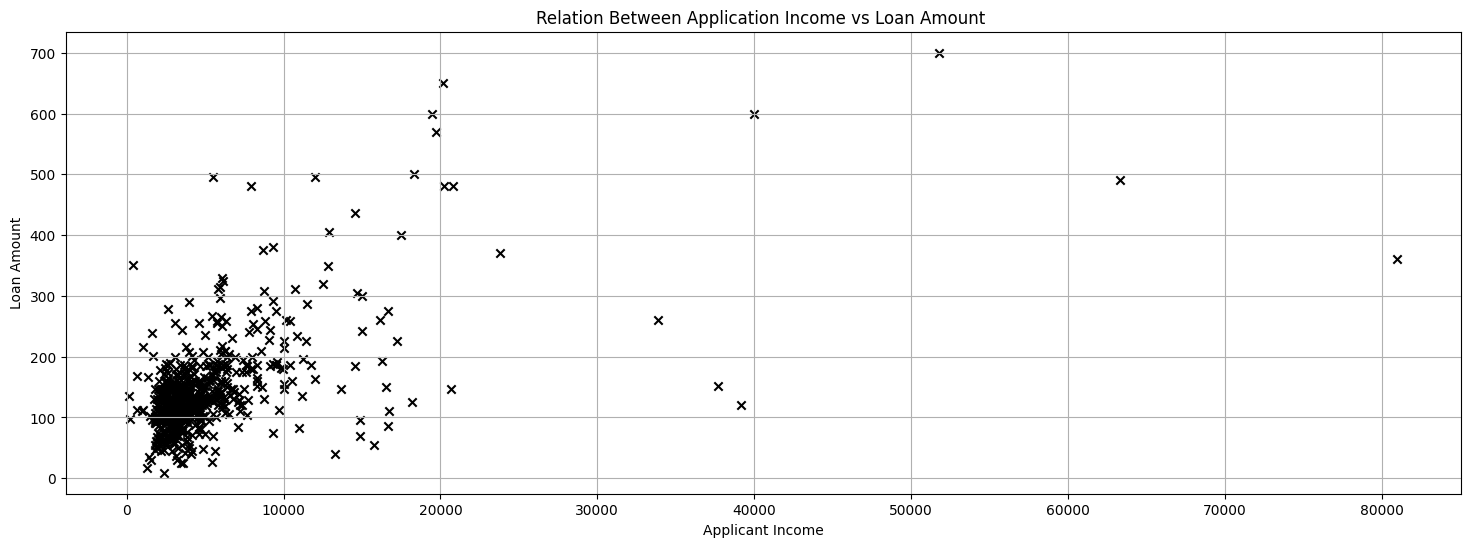

In [56]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Application Income vs Loan Amount ")
plt.grid()
plt.scatter(df_train['ApplicantIncome'] , df_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()